# Population, Agricultural Production, and the Green Revolution

In [31]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
pd.options.plotting.backend = "plotly"
%pip install wbdata
import wbdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Set World Bank Data Sources/Indicators for Population
 
SOURCE = 40 # "Population estimates and projections
pop_indicators = wbdata.get_indicators(source=SOURCE)

pop_indicators

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

In [33]:
import wbdata

# Return list of all country/region codes:
wbdata.get_countries()

# Return list matching a query term:
wbdata.get_countries(query="World")
wbdata.get_countries(query="United")

## Try your own search!
wbdata.get_countries(query="")

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

## Population Analysis

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

In [34]:
# Load in population data and specify Maritime Southeast Asia data set
variable_labels = {"SP.POP.TOTL": "Total Population", 
                   "SP.POP.TOTL.FE.IN": "Total Female",
                   "SP.POP.TOTL.MA.IN": "Total Male",
                   "SP.RUR.TOTL": "Total Rural",
                   "SP.URB.TOTL": "Total Urban"}

countries = {"BRN": "Brunei Darussalam",
             "IDN": "Indonesia",
             "MYS": "Malaysia",
             "PNG": "Papua New Guinea",
             "PHL": "Philippines",
             "TLS": "Timor-Leste"
            }


MSEA_pop = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()

MSEA_pop = MSEA_pop.unstack('country')
MSEA_pop = MSEA_pop.reset_index()
MSEA_pop = MSEA_pop.rename(columns={'date': 'Year'})
MSEA_pop = MSEA_pop.set_index(['Year']).sort_index()
MSEA_pop


# Attributes of interest: Total Population, Total Female Population, Total Male Population, Total Rural Population
# and Total Urban Population

Total Population                                            \
country    Brunei Darussalam    Indonesia    Malaysia Papua New Guinea   
Year                                                                     
1960-01-01           88347.0   88296070.0   7956197.0        1995110.0   
1961-01-01           92517.0   90791249.0   8164443.0        2046127.0   
1962-01-01           96719.0   93375850.0   8380172.0        2093919.0   
1963-01-01          101159.0   96051424.0   8602160.0        2141376.0   
1964-01-01          105922.0   98833749.0   8828406.0        2188325.0   
...                      ...          ...         ...              ...   
2019-01-01          442680.0  272489381.0  33440596.0        9609010.0   
2020-01-01          447404.0  274814866.0  33889558.0        9815746.0   
2021-01-01          451721.0  276758053.0  34282399.0       10012896.0   
2022-01-01          455370.0  278830529.0  34695493.0       10203169.0   
2023-01-01          458949.0  281190067.0  35126298.0       10389635.0   

                                         Total Female               \
country     Philippines Timor-Leste Brunei Darussalam    Indonesia   
Year                                                                 
1960-01-01   27891897.0    468118.0           41322.0   44356196.0   
1961-01-01   28792621.0    475291.0           43035.0   45602246.0   
1962-01-01   29723536.0    482774.0           44752.0   46890923.0   
1963-01-01   30674731.0    490564.0           46572.0   48223486.0   
1964-01-01   31643032.0    498659.0           48521.0   49610670.0   
...                 ...         ...               ...          ...   
2019-01-01  110804683.0   1300945.0          207287.0  135572405.0   
2020-01-01  112081264.0   1326053.0          209300.0  136741617.0   
2021-01-01  113100950.0   1350139.0          211320.0  137726598.0   
2022-01-01  113964338.0   1369295.0          213203.0  138760035.0   
2023-01-01  114891199.0   1384286.0          215060.0  139934300.0   

                                         ... Total Rural                   \
country       Malaysia Papua New Guinea  ...    Malaysia Papua New Guinea   
Year                                     ...                                
1960-01-01   3904222.0         940367.0  ...   5840008.0        1920792.0   
1961-01-01   4013953.0         965582.0  ...   5940367.0        1963791.0   
1962-01-01   4126940.0         988502.0  ...   6042523.0        2002896.0   
1963-01-01   4242596.0        1010920.0  ...   6145555.0        2040860.0   
1964-01-01   4360017.0        1032690.0  ...   6247686.0        2077399.0   
...                ...              ...  ...         ...              ...   
2019-01-01  15854594.0        4643189.0  ...   7822759.0        8335816.0   
2020-01-01  16067734.0        4747803.0  ...   7740375.0        8505835.0   
2021-01-01  16273730.0        4848513.0  ...   7646346.0        8665561.0   
2022-01-01  16491015.0        4946016.0  ...   7558760.0        8817375.0   
2023-01-01  16716229.0        5041654.0  ...   7476281.0        8963865.0   

                                         Total Urban                           \
country    Philippines Timor-Leste Brunei Darussalam    Indonesia    Malaysia   
Year                                                                            
1960-01-01  19441489.0    420880.0           38343.0   12878865.0   2116189.0   
1961-01-01  19995036.0    426607.0           41844.0   13456171.0   2224076.0   
1962-01-01  20563931.0    432030.0           45526.0   14060535.0   2337649.0   
1963-01-01  21141945.0    437657.0           49487.0   14694907.0   2456605.0   
1964-01-01  21726106.0    443477.0           53783.0   15361730.0   2580720.0   
...                ...         ...               ...          ...         ...   
2019-01-01  58561383.0    898342.0          345034.0  152553180.0  25617837.0   
2020-01-01  58945778.0    910733.0          350094.0  155657888.0  26149183.0   
2021-01-01  59169893.0  

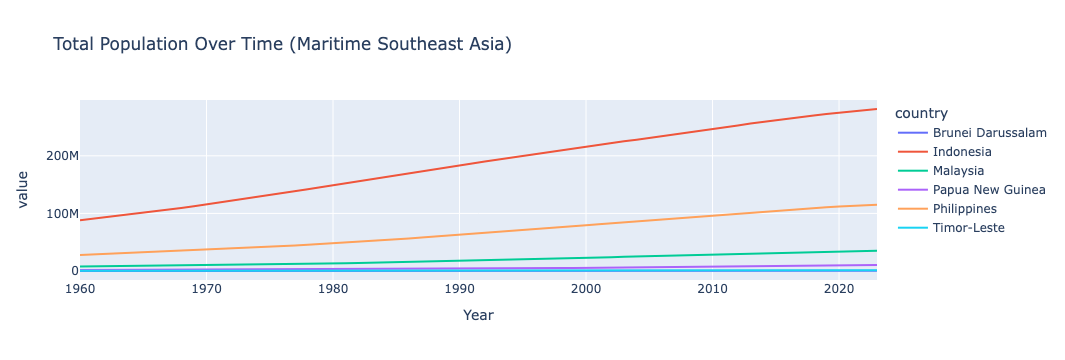

In [35]:
# Produce total population over time plot (include each country and the region)
MSEA_total = MSEA_pop["Total Population"]

MSEA_total.plot(title="Total Population Over Time (Maritime Southeast Asia)")

In [36]:
# Calculate total population for the region by summing across all countries
total_population_index = MSEA_pop["Total Population"].sum(axis=1)

# Convert to DataFrame for easier manipulation
total_population_df = total_population_index.reset_index()

# Rename columns appropriately
total_population_df.columns = ['Year', 'Total Population']

# Display the first 10 rows
total_population_df.head(10)


,Year,Total Population
0,1960-01-01,126695739.0
1,1961-01-01,130362248.0
2,1962-01-01,134152970.0
3,1963-01-01,138061414.0
4,1964-01-01,142098093.0
5,1965-01-01,145900546.0
6,1966-01-01,149611956.0
7,1967-01-01,153638009.0
8,1968-01-01,157864529.0
9,1969-01-01,162247764.0


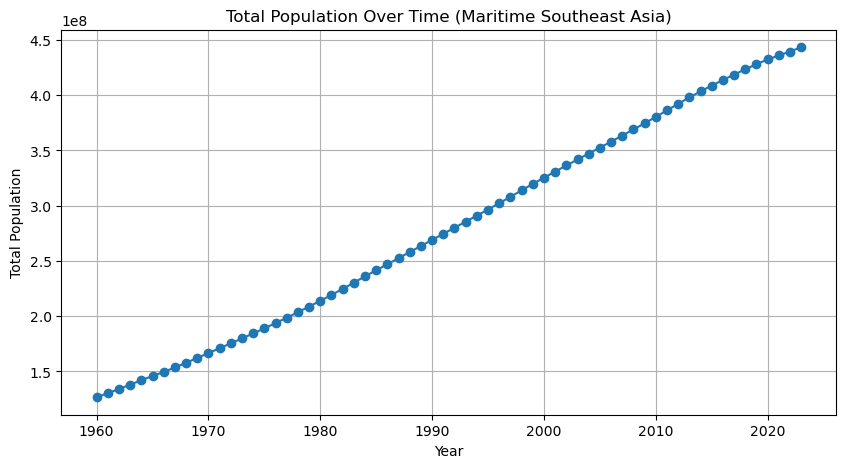

In [37]:
import matplotlib.pyplot as plt

# Calculate total population for the region
MSEA_total = MSEA_pop["Total Population"].sum(axis=1)

# Create a DataFrame for plotting
MSEA_total_df = MSEA_total.reset_index()
MSEA_total_df.columns = ['Year', 'Total Population']

# Plot the total population over time
plt.figure(figsize=(10, 5))
plt.plot(MSEA_total_df['Year'], MSEA_total_df['Total Population'], marker='o', linestyle='-')

# Add title and labels
plt.title("Total Population Over Time (Maritime Southeast Asia)")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.grid(True)

# Show the plot
plt.show()


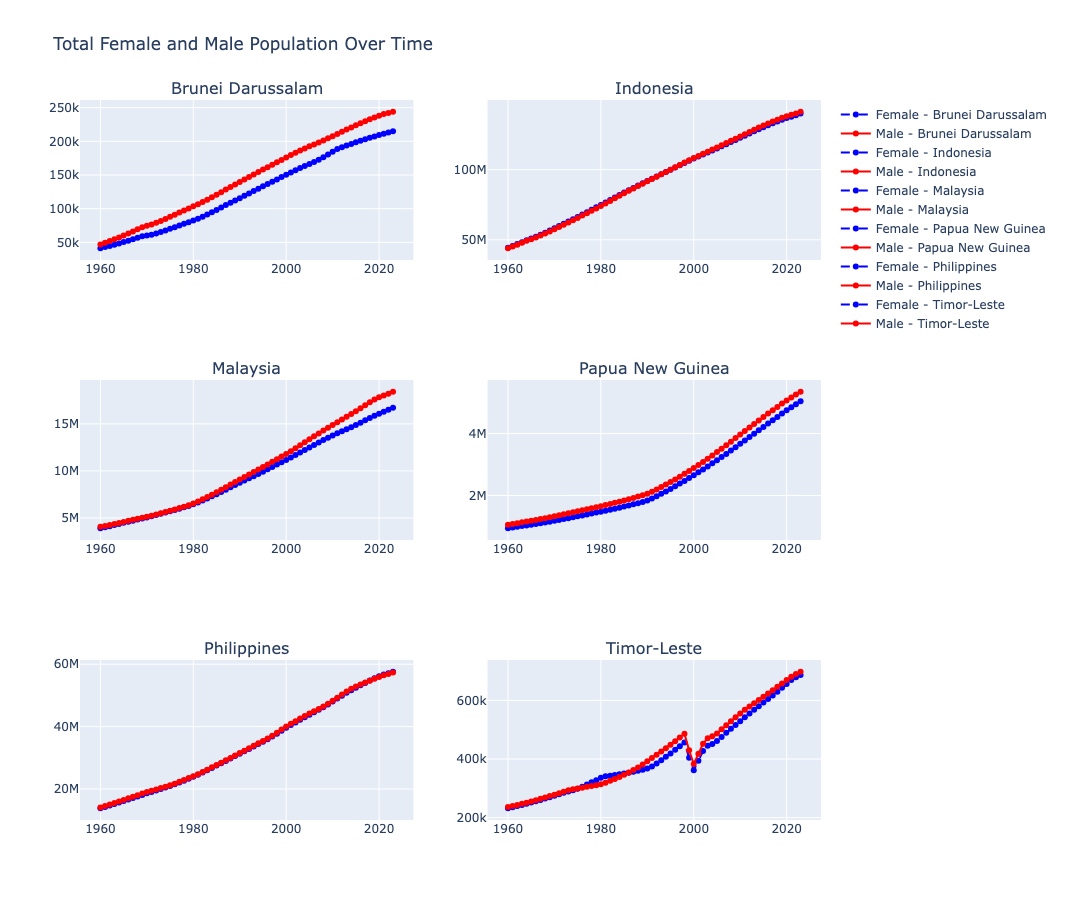

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def overlay_population_multiple(countries, df):
    """
    Function to overlay female and male population for multiple countries, displaying two countries per row.

    Parameters:
    - countries (list): List of country names to plot.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with subplots displaying female and male population data.
    """
    
    num_countries = len(countries)
    num_rows = (num_countries + 1) // 2  # Ensures we have enough rows (2 plots per row)
    
    # Create subplots (2 columns)
    fig = make_subplots(rows=num_rows, cols=2, subplot_titles=countries)
    
    for i, country_name in enumerate(countries):
        row = (i // 2) + 1
        col = (i % 2) + 1
        
        if country_name not in df.columns.get_level_values('country'):
            print(f"Country '{country_name}' not found in the dataset.")
            continue
        
        # Extract the female and male population data for the country
        female = df[('Total Female', country_name)]
        male = df[('Total Male', country_name)]
        
        # Add Female Population Line
        fig.add_trace(go.Scatter(x=female.index, y=female, mode='lines+markers', 
                                 name=f'Female - {country_name}', line=dict(dash='dash', color='blue')),
                      row=row, col=col)
        
        # Add Male Population Line
        fig.add_trace(go.Scatter(x=male.index, y=male, mode='lines+markers', 
                                 name=f'Male - {country_name}', line=dict(dash='solid', color='red')),
                      row=row, col=col)
    
    # Update layout
    fig.update_layout(title_text="Total Female and Male Population Over Time", 
                      height=300 * num_rows, width=1000, showlegend=True)
    
    # Show the plot
    fig.show()

# List of countries
countries_list = ["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", "Philippines", "Timor-Leste"]

# Generate the subplot visualization
overlay_population_multiple(countries_list, MSEA_pop)


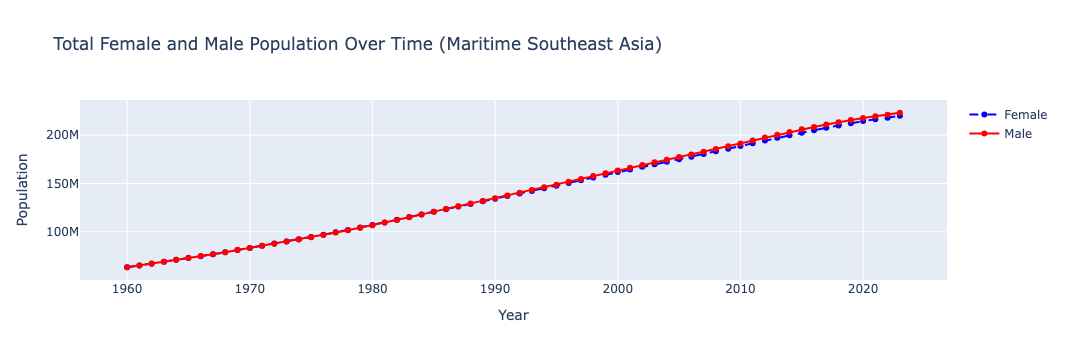

In [39]:
# Produce total female versus male populations over time for region as a whole
import plotly.graph_objects as go

def overlay_region_population(df, countries):
    """
    Function to overlay the total female and male population for the region (Maritime Southeast Asia).
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the population data.
    - countries (list): List of country names in the region to aggregate the data.
    
    Returns:
    - A Plotly figure with the overlayed female and male population data for the region.
    """
    
    # Aggregate the female and male population across the specified countries
    female_pop_region = df["Total Female"][countries].sum(axis=1)
    male_pop_region = df["Total Male"][countries].sum(axis=1)
    
    # Create a figure
    fig = go.Figure()
    
    # Add the total female population plot
    fig.add_trace(go.Scatter(x=female_pop_region.index, y=female_pop_region, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the total male population plot
    fig.add_trace(go.Scatter(x=male_pop_region.index, y=male_pop_region, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Female and Male Population Over Time (Maritime Southeast Asia)",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

# List of countries in Maritime Southeast Asia
countries = ["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", "Philippines", "Timor-Leste"]

# Call the function to plot total female and male population for the region
overlay_region_population(MSEA_pop, countries)

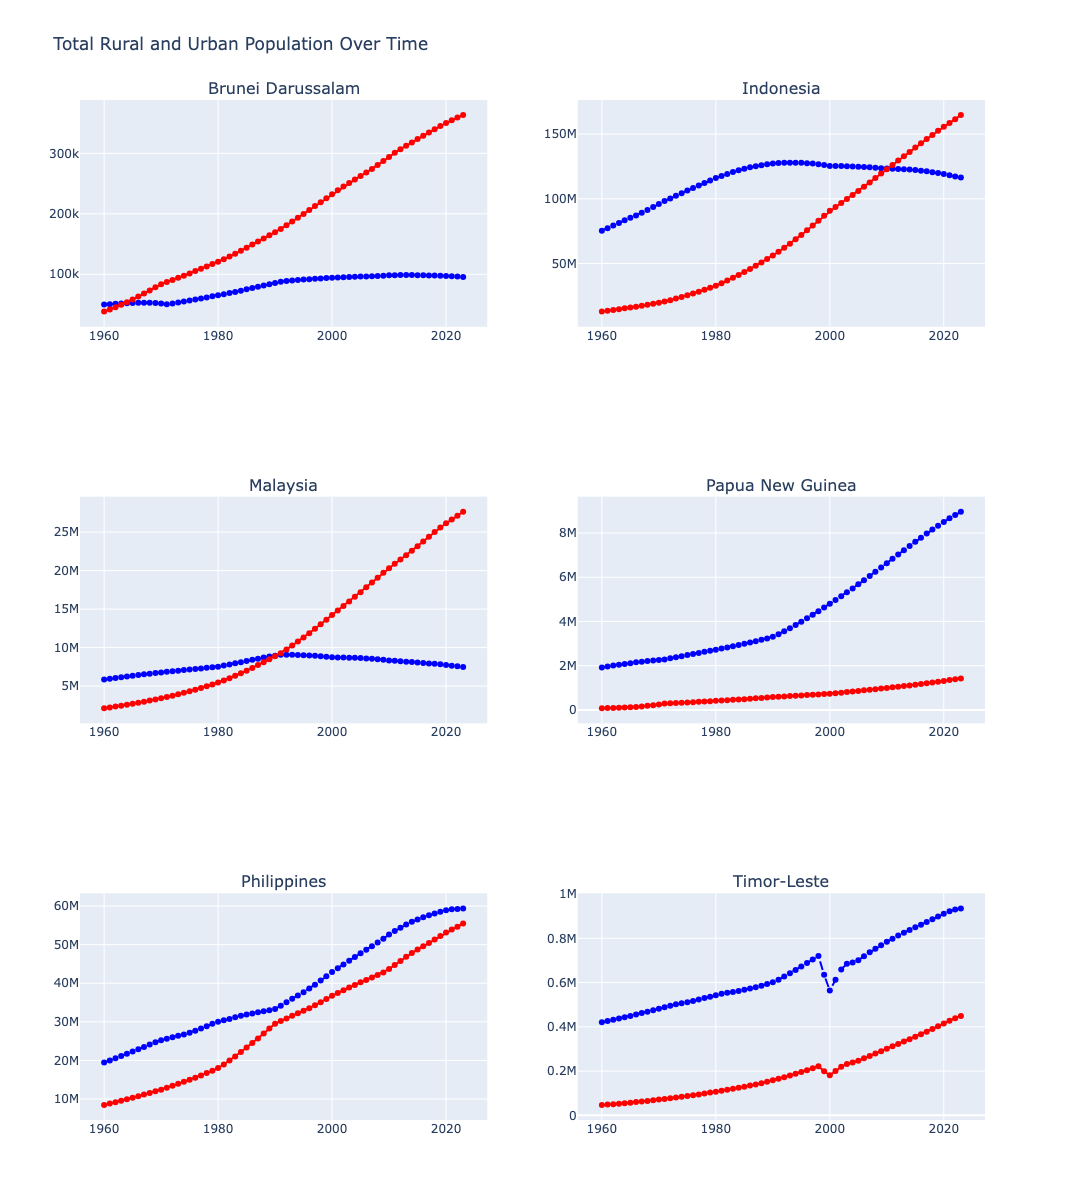

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def overlay_population_subplot(countries, df):
    """
    Function to create a subplot of rural and urban population trends for multiple countries.
    
    Parameters:
    - countries (list): List of country names to include in the plot.
    - df (pd.DataFrame): The DataFrame containing the population data.
    
    Returns:
    - A Plotly figure with subplots of rural and urban populations.
    """
    
    num_countries = len(countries)
    num_rows = (num_countries + 1) // 2  # Ensure we have enough rows (2 per row)
    
    # Create subplots with two plots per row
    fig = make_subplots(rows=num_rows, cols=2, subplot_titles=countries)

    for i, country in enumerate(countries):
        row = (i // 2) + 1
        col = (i % 2) + 1

        # Check if country exists
        if country not in df.columns.get_level_values('country'):
            print(f"Country '{country}' not found in the dataset.")
            continue
        
        # Extract rural and urban population data
        rural = df[('Total Rural', country)]
        urban = df[('Total Urban', country)]
        
        # Add rural population trace
        fig.add_trace(go.Scatter(x=rural.index, y=rural, mode='lines+markers', 
                                 name=f'{country} - Rural', line=dict(dash='dash', color='blue')),
                      row=row, col=col)
        
        # Add urban population trace
        fig.add_trace(go.Scatter(x=urban.index, y=urban, mode='lines+markers', 
                                 name=f'{country} - Urban', line=dict(dash='solid', color='red')),
                      row=row, col=col)

    # Update layout
    fig.update_layout(title="Total Rural and Urban Population Over Time",
                      height=400 * num_rows,  # Adjust height dynamically
                      showlegend=False)

    fig.show()

# List of countries to visualize
countries_list = ["Brunei Darussalam", "Indonesia", "Malaysia", 
                  "Papua New Guinea", "Philippines", "Timor-Leste"]

overlay_population_subplot(countries_list, MSEA_pop)


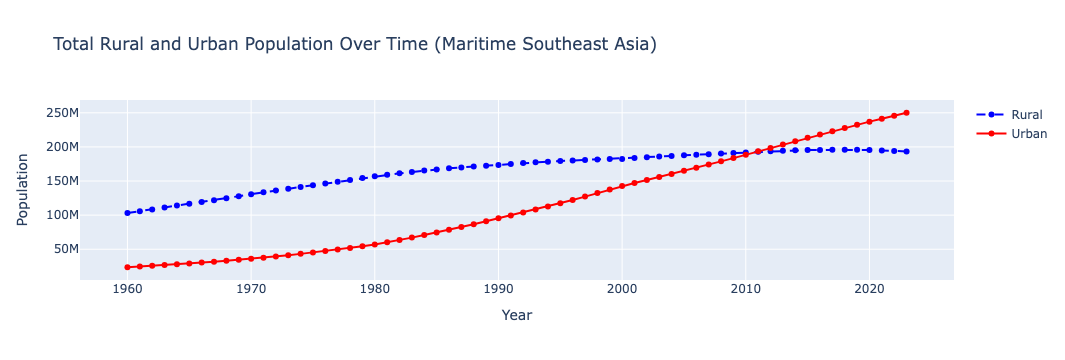

In [41]:
# Produce total rural versus urban populations over time for region as a whole
import plotly.graph_objects as go

def overlay_rural_urban_region(df):
    """
    Function to overlay total rural and urban populations for the region (Maritime Southeast Asia) as a whole.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the population data for the region.

    Returns:
    - A Plotly figure with the overlayed total rural and urban population data for the region.
    """
    # Aggregate total rural and urban populations across all countries
    rural = df['Total Rural'].sum(axis=1)
    urban = df['Total Urban'].sum(axis=1)
    
    # Create a figure
    fig = go.Figure()
    
    # Add the rural population plot
    fig.add_trace(go.Scatter(x=rural.index, y=rural, mode='lines+markers', name='Rural', line=dict(dash='dash', color='blue')))
    
    # Add the urban population plot
    fig.add_trace(go.Scatter(x=urban.index, y=urban, mode='lines+markers', name='Urban', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Rural and Urban Population Over Time (Maritime Southeast Asia)",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

# Call the function to overlay total rural and urban populations for the region
overlay_rural_urban_region(MSEA_pop)


## Agricultural Analysis

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

In [42]:
# Install required packages
!pip install wbdata
!pip install matplotlib
!pip install pandas
!pip install plotly
!pip install eep153_tools
!pip install python_gnupg
!pip install -U gspread_pandas

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import wbdata
import plotly
import warnings

# Set Plotly as the default backend for Pandas plotting
pd.options.plotting.backend = "plotly"

# Suppress warnings about cache not found from wbdata
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

In [43]:
wbdata.get_indicators(topic=1)

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO        Agricultural machinery, tractors
AG.CON.FERT.PT.ZS     Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS        Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.HA        Arable land (hectares)
AG.LND.ARBL.HA.PC     Arable land (hectares per person)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.CREL.HA        Land under cereal production (hectares)
AG.LND.CROP.ZS        Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)

In [44]:
# Define countries in the Maritime Southeast Asia region (using ISO-3166 country codes)
countries = ['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS']  # Brunei, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste
countries

['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS']

In [45]:
variable_labels = {"AG.PRD.CREL.MT":"Cereal Production (MT)",
                   "AG.PRD.CROP.XD":"Crop Production Index",
                  "AG.PRD.FOOD.XD":"Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'
                  # "EA.PRD.AGRI.KD":"Agricultural Value Added per Worker"
                  }

variable_labels

{'AG.PRD.CREL.MT': 'Cereal Production (MT)',
 'AG.PRD.CROP.XD': 'Crop Production Index',
 'AG.PRD.FOOD.XD': 'Food Production Index',
 'SP.RUR.TOTL': 'Total Rural Population'}

In [46]:
MSEA_ag = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True)
MSEA_ag = MSEA_ag.reset_index()
MSEA_ag = MSEA_ag.rename(columns={'date': 'Date', 'country':'Country'})
MSEA_ag = MSEA_ag.set_index(['Date']).sort_index()
MSEA_ag = MSEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])
MSEA_ag.head(10)

,Country,Cereal Production (MT),Crop Production Index,Food Production Index,Total Rural Population
Date,,,,,
1961-01-01,Indonesia,14367100.0,16.93,20.36,77335078.0
1961-01-01,Timor-Leste,34257.0,40.17,62.53,426607.0
1961-01-01,Malaysia,1097075.0,17.21,18.63,5940367.0
1961-01-01,Philippines,5176370.0,26.42,22.34,19995036.0
1961-01-01,Papua New Guinea,1850.0,27.63,29.80,1963791.0
1961-01-01,Brunei Darussalam,4908.0,72.24,10.92,50673.0
1962-01-01,Papua New Guinea,1891.0,28.88,30.93,2002896.0
1962-01-01,Philippines,5239880.0,28.08,23.83,20563931.0
1962-01-01,Indonesia,16246900.0,18.31,22.14,79315315.0


In [47]:
vars = {"AG.PRD.CREL.MT":"Cereal production"}
use=["BRN", "IDN", "MYS", "PNG", "PHL", "TLS"]
cereals = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')
cereals.plot(title="Cereal Production Over Time by Country")

In [48]:
total_cereal_production = cereals.sum(axis=1)  
total_cereal_df = total_cereal_production.reset_index()
total_cereal_df.columns = ['Year', 'Total Cereal Production (MT)']  
total_cereal_df.head(10)

,Year,Total Cereal Production (MT)
0,1960-01-01,0.0
1,1961-01-01,20681560.0
2,1962-01-01,22662559.0
3,1963-01-01,20331695.0
4,1964-01-01,22534749.0
5,1965-01-01,22087237.0
6,1966-01-01,24220648.0
7,1967-01-01,23027741.0
8,1968-01-01,27996782.0
9,1969-01-01,29430014.0


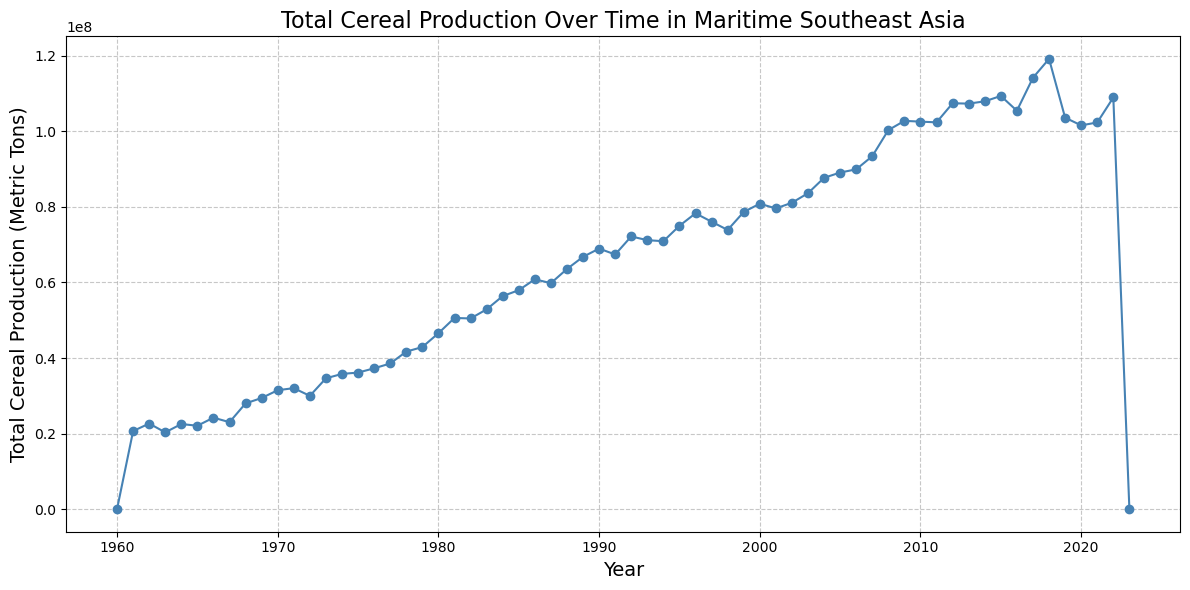

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(total_cereal_df['Year'], total_cereal_df['Total Cereal Production (MT)'], marker='o', color='steelblue')
plt.title('Total Cereal Production Over Time in Maritime Southeast Asia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cereal Production (Metric Tons)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
import wbdata
import plotly.graph_objects as go
from plotly.subplots import make_subplots

countries = ['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS'] 

variable_labels = {"AG.PRD.CREL.MT": "Cereal Production (MT)",
                   "AG.PRD.CROP.XD": "Crop Production Index",
                   "AG.PRD.FOOD.XD": "Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'}

MSEA_ag = wbdata.get_dataframe(variable_labels, country=countries, parse_dates=True)
MSEA_ag = MSEA_ag.reset_index()
MSEA_ag = MSEA_ag.rename(columns={'date': 'Date', 'country': 'Country'})
MSEA_ag = MSEA_ag.set_index(['Date']).sort_index()
MSEA_ag = MSEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])

def overlay_cereal_production(country_name, df, fig, row, col):
    df = df.reset_index()
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    country_df = df[df['Country'] == country_name]
    
    # Add the cereal production plot for the country
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Cereal Production (MT)'],
                             mode='lines+markers', name=country_name,
                             line=dict(dash='solid')),
                  row=row, col=col)
    
    fig.update_layout(title=f"Cereal Production Over Time ({country_name})",
                      xaxis_title="Year", yaxis_title="Cereal Production (MT)")

fig = make_subplots(rows=3, cols=2, subplot_titles=["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", 
                                                    "Philippines", "Timor-Leste"])

overlay_cereal_production("Brunei Darussalam", MSEA_ag, fig, 1, 1)
overlay_cereal_production("Indonesia", MSEA_ag, fig, 1, 2)
overlay_cereal_production("Malaysia", MSEA_ag, fig, 2, 1)
overlay_cereal_production("Papua New Guinea", MSEA_ag, fig, 2, 2)
overlay_cereal_production("Philippines", MSEA_ag, fig, 3, 1)
overlay_cereal_production("Timor-Leste", MSEA_ag, fig, 3, 2)

fig.update_layout(title_text="Cereal Production Over Time (Maritime Southeast Asia)",
                  height=900, width=1000, showlegend=False)

fig.show()

In [51]:
vars = {"AG.PRD.CROP.XD": "Crop Production Index"}
use=["BRN", "IDN", "MYS", "PNG", "PHL", "TLS"]
crops = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')
crops.plot(title="Crop Production Index Over Time by Country")

In [52]:
total_crop_index = crops.sum(axis=1)
total_crop_df = total_crop_index.reset_index()
total_crop_df.columns = ['Year', 'Total Crop Production Index']
total_crop_df.head(10)

,Year,Total Crop Production Index
0,1960-01-01,0.00
1,1961-01-01,200.60
2,1962-01-01,204.88
3,1963-01-01,199.19
4,1964-01-01,198.19
5,1965-01-01,194.37
6,1966-01-01,198.80
7,1967-01-01,216.04
8,1968-01-01,212.46
9,1969-01-01,235.37


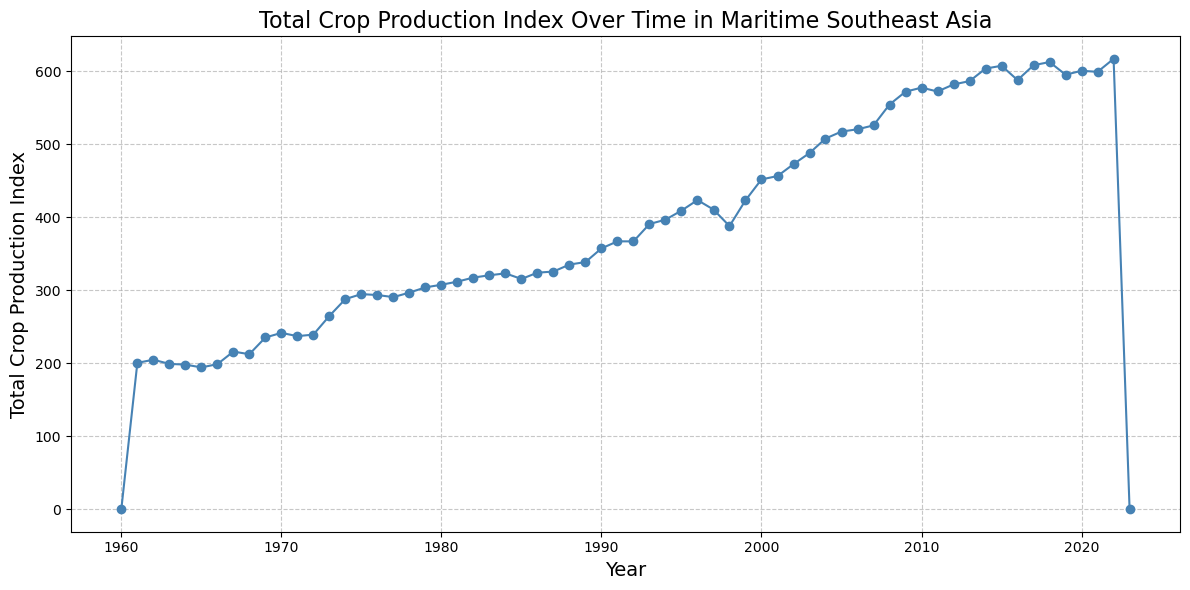

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(total_crop_df['Year'], total_crop_df['Total Crop Production Index'], marker='o', color='steelblue')
plt.title('Total Crop Production Index Over Time in Maritime Southeast Asia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Crop Production Index', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
import wbdata
import plotly.graph_objects as go
from plotly.subplots import make_subplots

countries = ['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS'] 

variable_labels = {"AG.PRD.CREL.MT": "Cereal Production (MT)",
                   "AG.PRD.CROP.XD": "Crop Production Index",
                   "AG.PRD.FOOD.XD": "Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'}

MSEA_ag = wbdata.get_dataframe(variable_labels, country=countries, parse_dates=True)
MSEA_ag = MSEA_ag.reset_index()
MSEA_ag = MSEA_ag.rename(columns={'date': 'Date', 'country': 'Country'})
MSEA_ag = MSEA_ag.set_index(['Date']).sort_index()
MSEA_ag = MSEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])

def overlay_crop_production(country_name, df, fig, row, col):
    df = df.reset_index()
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    country_df = df[df['Country'] == country_name]
    
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Crop Production Index'],
                             mode='lines+markers', name=country_name,
                             line=dict(dash='solid')),
                  row=row, col=col)
    
    fig.update_layout(title=f"Crop Production Index Over Time ({country_name})",
                      xaxis_title="Year", yaxis_title="Crop Production Index")

fig = make_subplots(rows=3, cols=2, subplot_titles=["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", 
                                                    "Philippines", "Timor-Leste"])

overlay_crop_production("Brunei Darussalam", MSEA_ag, fig, 1, 1)
overlay_crop_production("Indonesia", MSEA_ag, fig, 1, 2)
overlay_crop_production("Malaysia", MSEA_ag, fig, 2, 1)
overlay_crop_production("Papua New Guinea", MSEA_ag, fig, 2, 2)
overlay_crop_production("Philippines", MSEA_ag, fig, 3, 1)
overlay_crop_production("Timor-Leste", MSEA_ag, fig, 3, 2)

fig.update_layout(title_text="Crop Production Index Over Time (Maritime Southeast Asia)",
                  height=900, width=1000, showlegend=False)

fig.show()

In [55]:
vars = {"AG.PRD.FOOD.XD": "Food Production Index"}
use=["BRN", "IDN", "MYS", "PNG", "PHL", "TLS"]
food = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')
food.plot(title="Food Production Index Over Time by Country")

In [56]:
total_food_index = food.sum(axis=1)
total_food_df = total_food_index.reset_index()
total_food_df.columns = ['Year', 'Total Food Production Index']
total_food_df.head(10)

,Year,Total Food Production Index
0,1960-01-01,0.00
1,1961-01-01,164.58
2,1962-01-01,172.75
3,1963-01-01,173.69
4,1964-01-01,178.31
5,1965-01-01,181.63
6,1966-01-01,186.26
7,1967-01-01,193.39
8,1968-01-01,196.83
9,1969-01-01,208.32


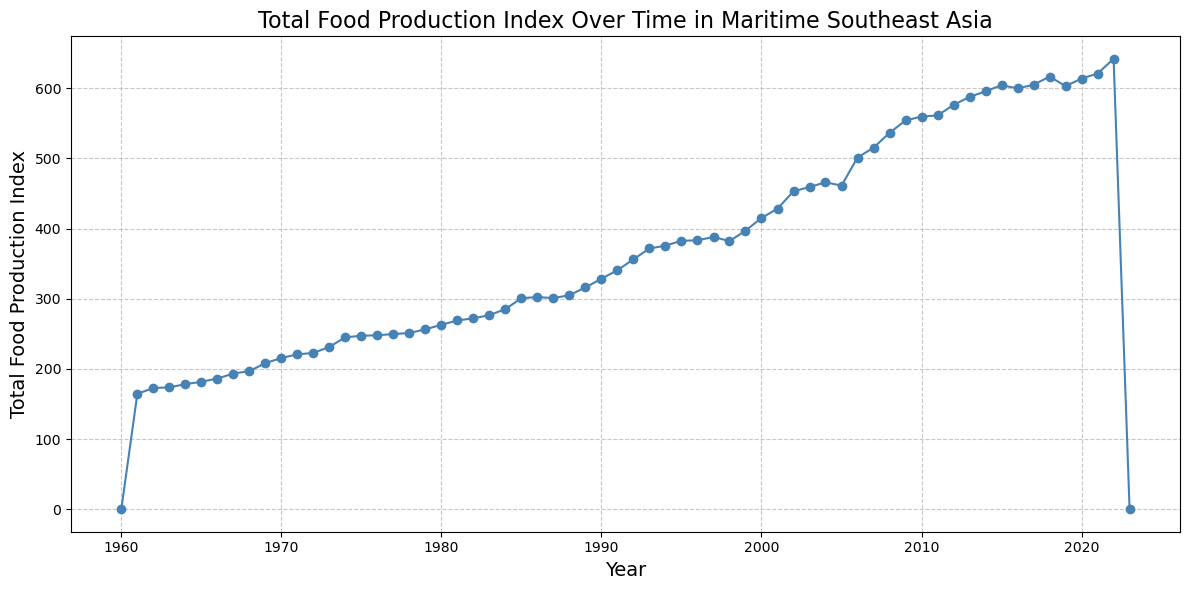

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(total_food_df['Year'], total_food_df['Total Food Production Index'], marker='o', color='steelblue')
plt.title('Total Food Production Index Over Time in Maritime Southeast Asia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Food Production Index', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
import wbdata
import plotly.graph_objects as go
from plotly.subplots import make_subplots

countries = ['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS'] 

variable_labels = {"AG.PRD.CREL.MT": "Cereal Production (MT)",
                   "AG.PRD.CROP.XD": "Crop Production Index",
                   "AG.PRD.FOOD.XD": "Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'}

MSEA_ag = wbdata.get_dataframe(variable_labels, country=countries, parse_dates=True)
MSEA_ag = MSEA_ag.reset_index()
MSEA_ag = MSEA_ag.rename(columns={'date': 'Date', 'country': 'Country'})
MSEA_ag = MSEA_ag.set_index(['Date']).sort_index()
MSEA_ag = MSEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])

def overlay_food_production(country_name, df, fig, row, col):
    df = df.reset_index()
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    country_df = df[df['Country'] == country_name]
    
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Food Production Index'],
                             mode='lines+markers', name=country_name,
                             line=dict(dash='solid')),
                  row=row, col=col)
    
    fig.update_layout(title=f"Food Production Index Over Time ({country_name})",
                      xaxis_title="Year", yaxis_title="Food Production Index")

fig = make_subplots(rows=3, cols=2, subplot_titles=["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", 
                                                    "Philippines", "Timor-Leste"])

overlay_food_production("Brunei Darussalam", MSEA_ag, fig, 1, 1)
overlay_food_production("Indonesia", MSEA_ag, fig, 1, 2)
overlay_food_production("Malaysia", MSEA_ag, fig, 2, 1)
overlay_food_production("Papua New Guinea", MSEA_ag, fig, 2, 2)
overlay_food_production("Philippines", MSEA_ag, fig, 3, 1)
overlay_food_production("Timor-Leste", MSEA_ag, fig, 3, 2)

fig.update_layout(title_text="Food Production Index Over Time (Maritime Southeast Asia)",
                  height=900, width=1000, showlegend=False)

fig.show()

## Combined Analysis

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

In [59]:
# Merge population and agriculture data on 'Year'
combined_df = total_population_df.merge(total_crop_df, on='Year', how='inner')

# Display the first 10 rows
combined_df.head(10)


,Year,Total Population,Total Crop Production Index
0,1960-01-01,126695739.0,0.00
1,1961-01-01,130362248.0,200.60
2,1962-01-01,134152970.0,204.88
3,1963-01-01,138061414.0,199.19
4,1964-01-01,142098093.0,198.19
5,1965-01-01,145900546.0,194.37
6,1966-01-01,149611956.0,198.80
7,1967-01-01,153638009.0,216.04
8,1968-01-01,157864529.0,212.46
9,1969-01-01,162247764.0,235.37


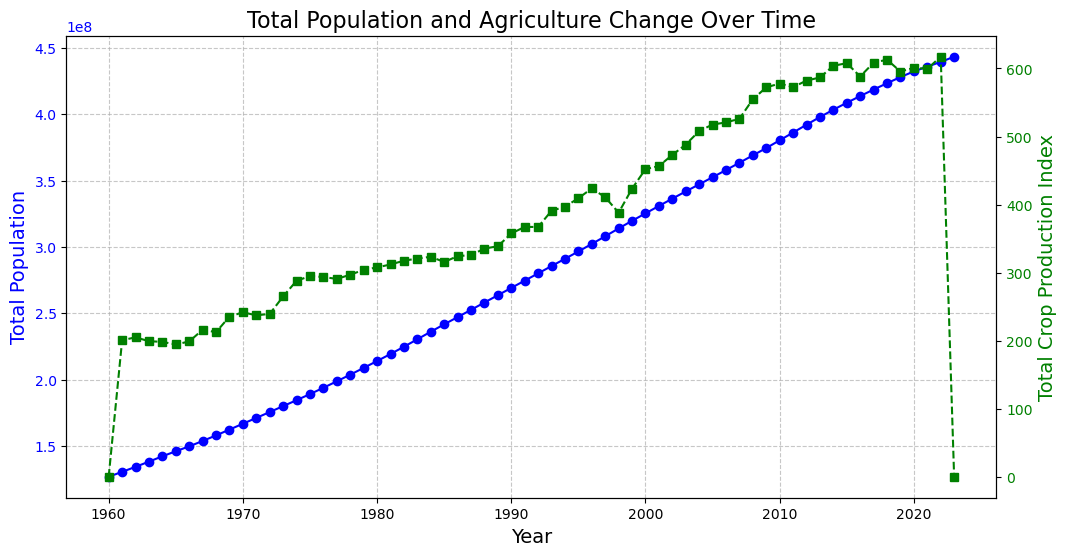

In [60]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Population on primary y-axis
ax1.plot(combined_df['Year'], combined_df['Total Population'], 
         marker='o', linestyle='-', color='blue', label='Total Population')
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Total Population", color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Total Crop Production Index
ax2 = ax1.twinx()
ax2.plot(combined_df['Year'], combined_df['Total Crop Production Index'], 
         marker='s', linestyle='--', color='green', label='Total Crop Production Index')
ax2.set_ylabel("Total Crop Production Index", color='green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')

# Add title and grid
plt.title("Total Population and Agriculture Change Over Time", fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
